<a href="https://colab.research.google.com/github/Boluwahduro/KMeans-Clustering-PCA-Analysis/blob/main/KMeans_Clustering_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the commonly used libraries

import pandas as pd
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances

In [ ]:
#loading the dataset
household_df = pd.read_csv('household_power_consumption.csv', sep=';')

In [ ]:
household_df.head()

In [ ]:
household_df.info()

In [ ]:
household_df.isnull().sum()

In [ ]:
household_df = household_df.drop (['Date', 'Time'], axis=1) #drop unused columns

In [ ]:
def clean_dataset(household_df):
    assert isinstance(household_df, pd.DataFrame), "df needs to be a pd.DataFrame"
    household_df.dropna(inplace=True)
    indices_to_keep = ~household_df.isin([np.nan, np.inf, -np.inf]).any(1)
    return household_df[indices_to_keep].astype(np.float64)

clean_dataset(household_df)

In [ ]:
#convert datframe to numpy

household_np = household_df.to_numpy()
household_np

#### Explore the categorical variables to find out the length of their unique labels

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = household_np
k_means = KMeans(n_clusters=3, random_state=0)
labels = k_means.fit_predict(X)

In [ ]:
print(labels)

In [ ]:
print(X)
X_New = np.array(X).astype(np.float64) # convert string to float

In [ ]:
#create a scatter plot

fig = plt.figure(figsize=(7, 6)) # set the size of the figure
#ax = Axes3D(fig) # define that you want a 3D figure
ax = fig.add_subplot(111,projection='3d')

# define which data is x, y, z
ax.scatter(X_New[:, 0], X_New[:, 1], X_New[:, 2], c = labels, cmap = 'viridis')

# Add labels to the plot and a title
ax.set_title("3 clusters")
plt.show()

#### Establish best fit for the dataset

In [ ]:
#get the distance between clusters
dists = euclidean_distances(k_means.cluster_centers_)
print(dists)

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
# Generate sample data
X, y = make_blobs(n_samples = 100, centers=3, random_state=42)

# Set up a range of cluster numbers to try
num_clusters = range(1, 10)

In [ ]:
# Fit KMeans models with different cluster numbers and record the inertia
inertias = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

In this example, we first generate some example data using the make_blobs function from scikit-learn. You can replace this line with X = household_np to use your own data. Then, we set up a range of cluster numbers to try using the range function.

Next, we loop over the range of cluster numbers and fit a KMeans model with the current number of clusters using the KMeans function from scikit-learn. We record the resulting inertia (sum of squared distances) of the clustering using the inertia_ attribute of the KMeans object.

In [ ]:
# Plot the results
plt.plot(num_clusters, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

import traceback
import sys

try:
    plt.show()
except:
    print(traceback.format_exc())
    sys.exit(1)

Finally, we plot the results using matplotlib. The x-axis of the plot shows the number of clusters, and the y-axis shows the inertia. You can use this plot to visually identify the "elbow point", where the inertia starts to level off and adding more clusters doesn't seem to improve the clustering performance significantly. This elbow point can give you a good indication of the appropriate number of clusters for your data.

The try function was used to catch any exceptions that are raised when the plot is shown and print the traceback to help identify the source of the problem.

The graph shows the sum of squared distances for KMeans clustering on a dataset with 6 features. The x-axis shows the number of clusters, and the y-axis shows the sum of squared distances. As the number of clusters increases, the sum of squared distances decreases. However, there is a point where the decrease in sum of squared distances starts to level off, forming an elbow shape. In this graph above, the elbow point is around 3 or 4 clusters, so this would be the optimal number of clusters for this dataset.

#### Correlation Matrix

In [ ]:
household_df

In [ ]:
#correlation matrix
#corr_matrix = household_df.corr() #to explicitly indicate that only numeric columns
#should be included in the correlation matrix.

#visuolization of the correlation matrix using heatmap
sns.heatmap(household_df.corr(), annot=True)

#display the heatmap
plt.show()

#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
household_df.corr()

C:\Users\684681\AppData\Local\Temp\ipykernel_14560\2825656752.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(household_df.corr(), annot = True)


<IPython.core.display.Javascript object>


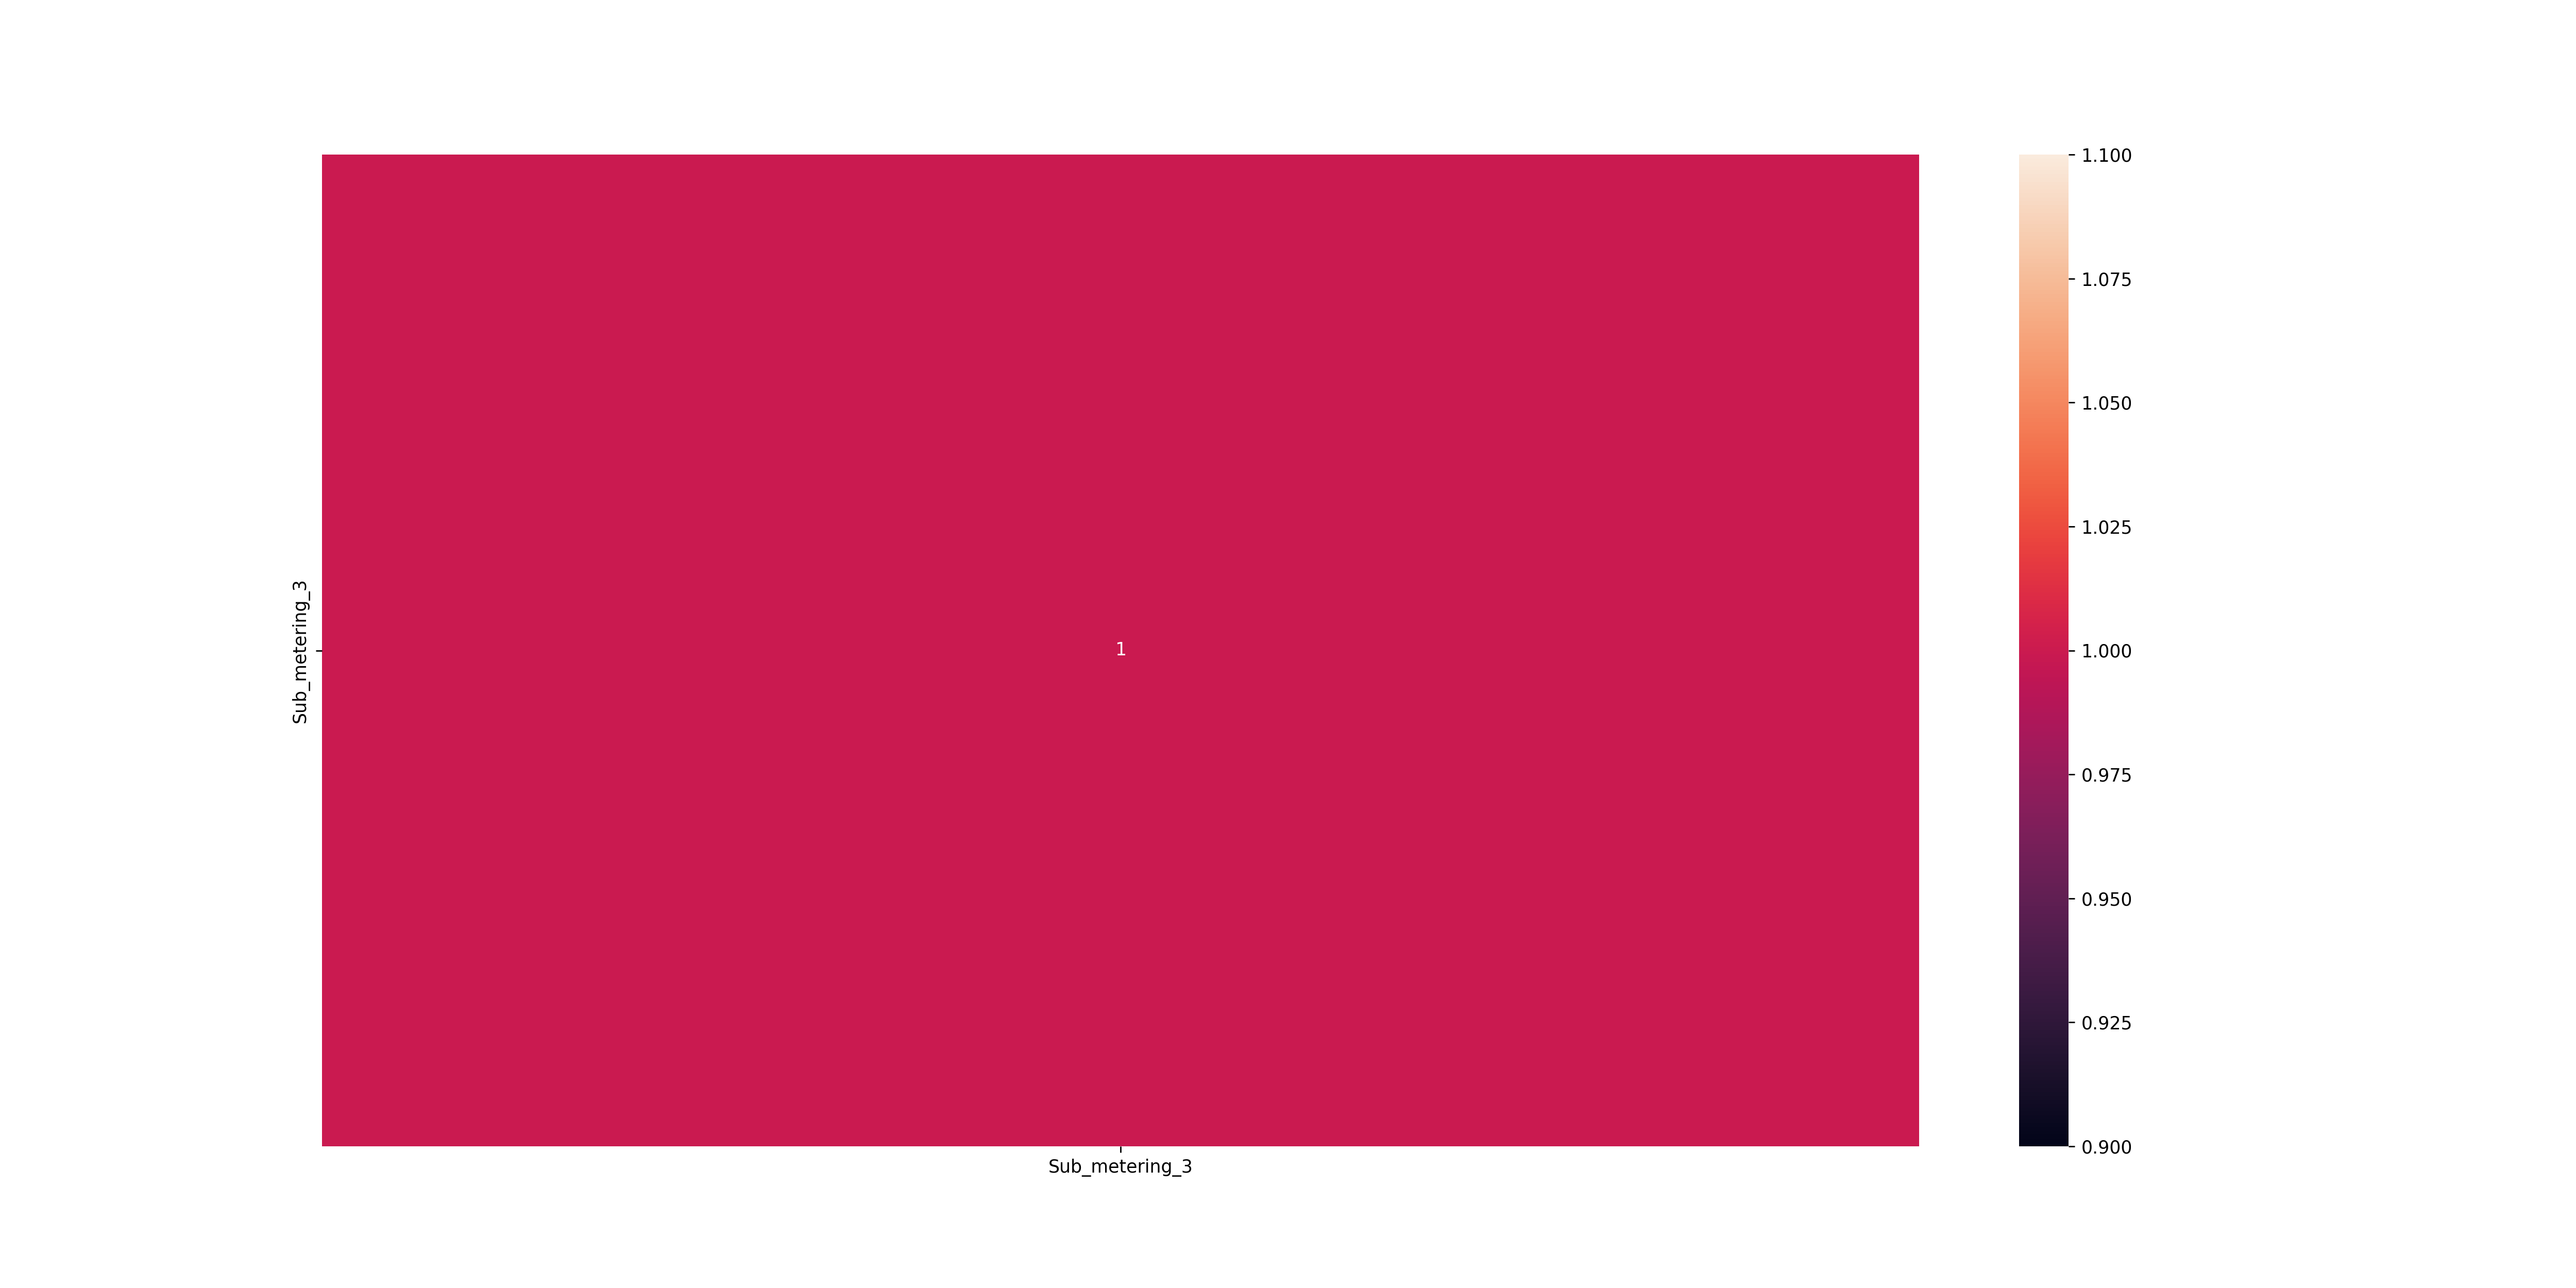

<IPython.core.display.Javascript object>


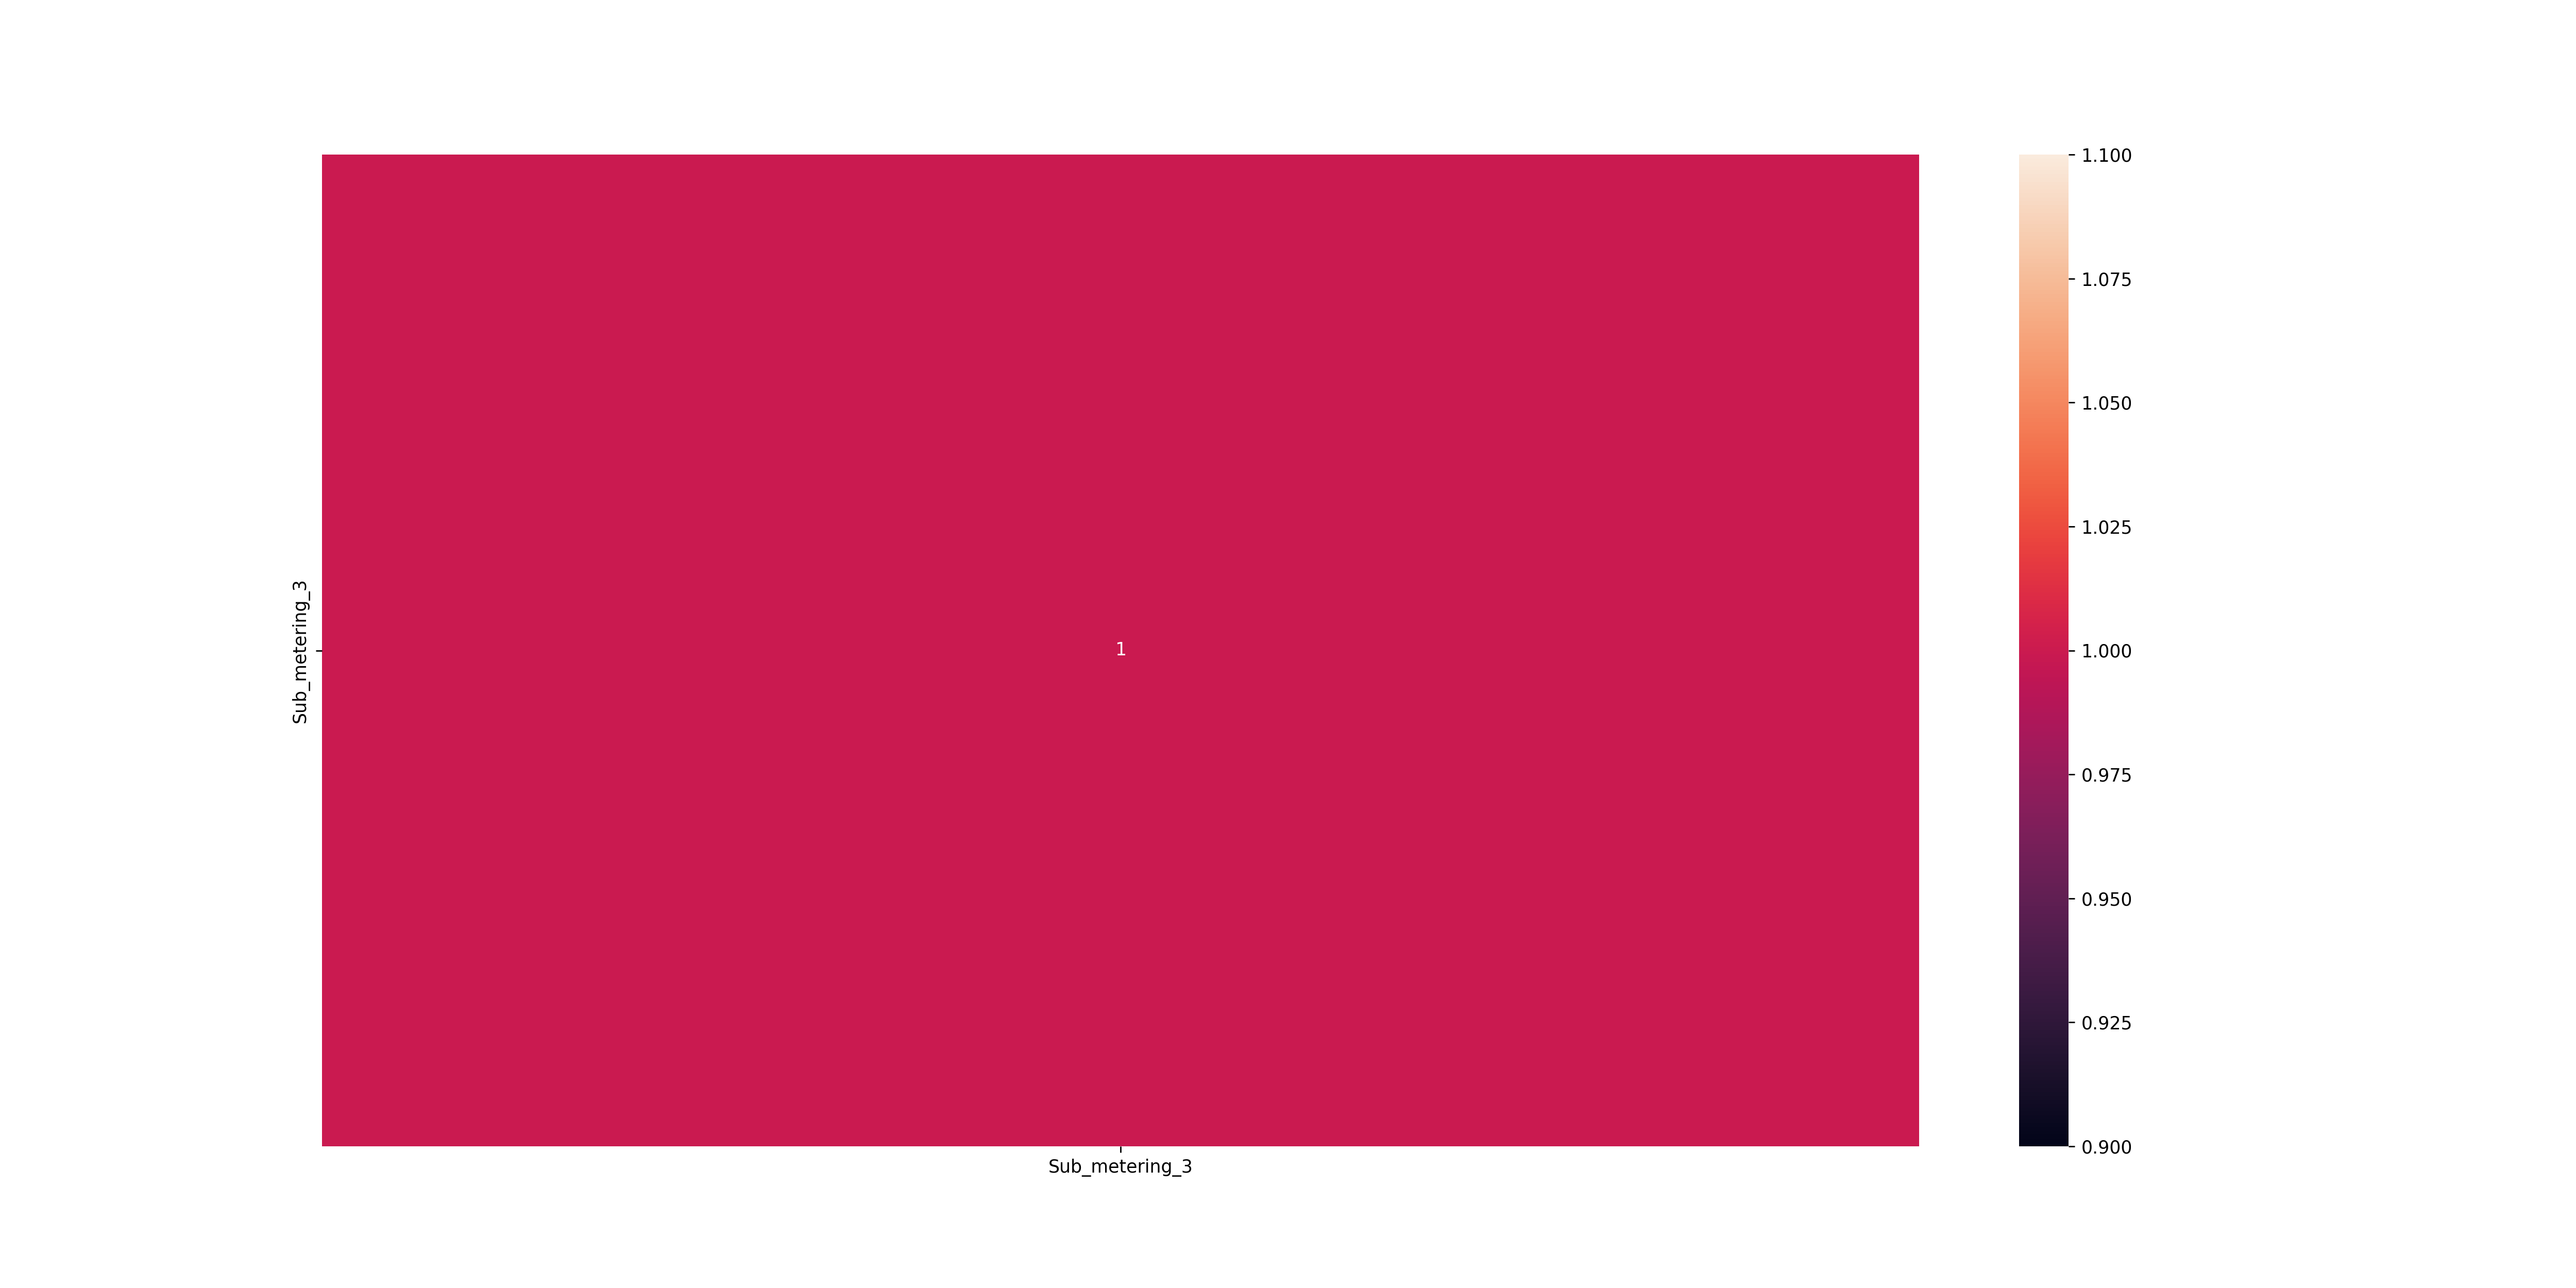

In [ ]:
#heatmap to check for correlation
plt.figure(dpi=200, figsize=(20,10))
sns.heatmap(household_df.corr(), annot = True)

plt.show()

In [ ]:
#%matplotlib inline

#plt.matshow(household_df.corr())
#plt.show

#### Principle Component Analysis (PCA)
PCA will help us catch out any correlations and reduce the dimensionality of our dataset by discovering new features.  

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#X = np.random.randn(100, 2)
pca = PCA(n_components=2) #svd_solver='randomized') # specify the number of principled components
x_pca2 = pca.fit_transform(X) # fit the model and transform the data to their new shape

In [ ]:
# per new dimension, see what % of variation in the dataset it accounts for...
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
print("percent_variance=", percent_variance)

percent_variance= [20.79 18.95]


The list percent_variance = [52.91, 47.09] represents the percentage of variance explained by each principal component in the dataset after applying Principal Component Analysis (PCA).

In PCA, the first principal component captures the direction of maximum variance in the data, and each subsequent component captures the maximum remaining variance that is orthogonal to the previous components. The percentage of variance explained by each component is a measure of how much information is retained after dimensionality reduction.

In the result above. The first principal component explains 52.91% of the variance in the data, while the second component explains 47.09% of the variance. This means that together, the two components capture 100% of the variance in the original data.

The sum of the percentage of variance explained by all the components should always be 100%, since all the information in the original data is retained after PCA.

#### Retrain your K-Means algorithm with the PCA components

In [ ]:
# create a sample dataset with 6 features and 100 observations
X = np.random.randn(100, 6)

# instantiate a PCA object with 4 components
pca = PCA(n_components=2)

# fit the model and transform the data to their new shape
x_pca2 = pca.fit_transform(X)

# instantiate a K-Means object with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# fit the K-Means model with the transformed data
kmeans.fit(x_pca2)

# get the cluster labels for each observation
labels = kmeans.labels_

# get the coordinates of the centroids in the new coordinate system
centroids = kmeans.cluster_centers_

C:\Users\684681\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


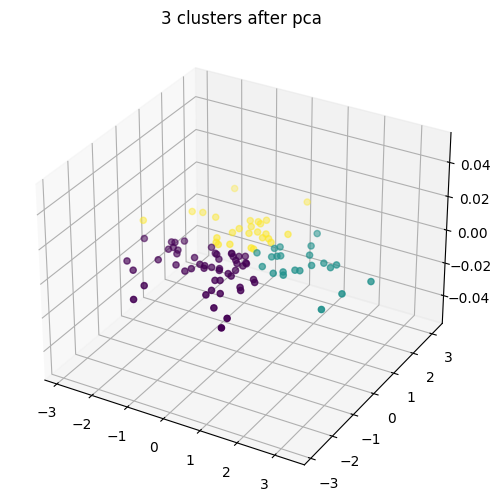

In [ ]:
#create a scatter plot

fig = plt.figure(figsize=(7, 6)) # set the size of the figure
#ax = Axes3D(fig) # define that you want a 3D figure
ax = fig.add_subplot(111,projection='3d')

# define which data is x, y, z
ax.scatter(x_pca2[:, 0], x_pca2[:, 1], c = labels, cmap = 'viridis')

# Add labels to the plot and a title
ax.set_title("3 clusters after pca")
plt.show()